In [1]:
import unidecode
import string
import random
import re

In [2]:
all_characters = string.printable
n_characters = len(all_characters)

file = unidecode.unidecode(open('data/calikusu.txt').read())
file_len = len(file)
print('file_len =', file_len)

file_len = 1384109


In [3]:
chunk_len = 200

def random_chunk():
    start_index = random.randint(0, file_len - chunk_len)
    end_index = start_index + chunk_len + 1
    return file[start_index:end_index]

print(random_chunk())

, ilk bakista onlari hatirlatiyordu.
Altlarina dort direkten ibaret ahirlar, ustlerinde asma merdivenle cikilan bir iki oda. Herhalde, Zeyniler
simdiye kadar isittigim ve resimlerini gordugum koylerden


In [4]:
import torch
import torch.nn as nn
from torch.autograd import Variable

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers=1):
        super(RNN, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.n_layers = n_layers
        
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.gru = nn.GRU(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)
        
    def forward(self, input, hidden):
        input = self.encoder(input.view(1, -1))
        output, hidden = self.gru(input.view(1, 1, -1), hidden)
        output = self.decoder(output.view(1, -1))
        return output, hidden
    
    def init_hidden(self):
        return Variable(torch.zeros(self.n_layers, 1, self.hidden_size))

In [5]:
def char_tensor(string):
    tensor = torch.zeros(len(string)).long()
    for c in range(len(string)):
        tensor[c] = all_characters.index(string[c])
    return Variable(tensor)

print(char_tensor('abcDEF'))

Variable containing:
 10
 11
 12
 39
 40
 41
[torch.LongTensor of size 6]



In [6]:
def random_training_set():
    chunk = random_chunk()
    inp = char_tensor(chunk[:-1])
    target = char_tensor(chunk[1:])
    return inp, target

In [7]:
def evaluate(prime_str = 'A', predict_len=100, temperature=0.8):
    hidden = decoder.init_hidden()
    prime_input = char_tensor(prime_str)
    predicted = prime_str
    
    for p in range(len(prime_str) - 1):
        _, hidden = decoder(prime_input[p], hidden)
    inp = prime_input[-1]
    
    for p in range(predict_len):
        output, hidden = decoder(inp, hidden)
        
        output_dist = output.data.view(-1).div(temperature).exp()
        top_i = torch.multinomial(output_dist, 1)[0]
        
        predicted_char = all_characters[top_i]
        predicted += predicted_char
        inp = char_tensor(predicted_char)
    return predicted


In [8]:
import time, math

def time_since(since):
    s = time.time() - since
    m = math.floor(s / 60)
    s -= m * 60
    return ('%dm %ds' % (m, s))

In [9]:
def train(inp ,target):
    hidden = decoder.init_hidden()
    decoder.zero_grad()
    loss = 0
    
    for c in range(chunk_len):
        output, hidden = decoder(inp[c], hidden)
        loss += criterion(output, target[c])
        
    loss.backward()
    decoder_optimizer.step()
    
    return loss.data[0] / chunk_len

In [10]:
n_epochs = 2000
print_every = 100
plot_every = 10
hidden_size = 200
n_layers = 2
lr = 0.005

decoder = RNN(n_characters, hidden_size, n_characters, n_layers)
decoder_optimizer = torch.optim.Adam(decoder.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

start = time.time()
all_losses = []
loss_avg = 0

for epoch in range(1, n_epochs, + 1):
    loss = train(*random_training_set())
    loss_avg += loss
    
    if epoch % print_every == 0:
        print('[%s (%d %d%%) %.4f]' % (time_since(start), epoch, epoch / n_epochs * 100, loss))
        print(evaluate('fa', 100), '\n')
        
    if epoch % plot_every == 0:
        all_losses.append(loss_avg / plot_every)
        loss_avg = 0
    
    

 46s (100 5%) 2.2064]
far sarin siy kapani. Bunerine ven icini iisilmeni me deklensensimde karde berinmeye Gungemindegirin b 

 38s (200 10%) 2.1118]
fak cerimderin kirtiyorsu vardi
gabi duldu gibi banimda duyan? Bey varmaya bucadi. Kuyunuyordum.
Bu co 

 34s (300 15%) 1.9295]
fahsimir parakmek kergiyI'li kenindesinin vari ikin olmah beniyte sava mahsehtirimi yakar tarsin hani  

 28s (400 20%) 1.8723]
fali yalat almas prayal bile olana daliklasiz iktis olarlarin
kadar yaflik onuncu. Bink kade dedirden: 

 22s (500 25%) 2.0081]
fara sukut senler ki?
Bay, isseye varmis arede, bi karsi, kizsi olnuzlarimda ne seslemek surlan bu kem 

 17s (600 30%) 1.9263]
fak ilinen kalamis
uhrasinin yolesene kadar elin kadinda bir indine circin icin inkindim.
Kendirdi had 

 3s (700 35%) 1.8933]
fa amaya cuygurdugu yaladigi karalik yaptigi verdi.
dukerinde der, tekrar. Basta:
- Bu ada cok kizat v 

 15s (800 40%) 2.1004]
fak bir gelin bakkasinin balik basigi basga basirahaten bascak baktiyordu. Ne sayan

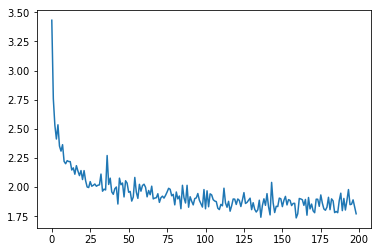

In [11]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

plt.figure()
plt.plot(all_losses)

In [12]:
print(evaluate('Ta', 200, temperature=0.7))

Tak egliyet evveliyle saklandan bana nananinda, uzerine edendiki ile nirtan bir taniya bir banin biliyordu. Onu bir hapali, fakat yapasindan nelemibi sizili yapisli tekrarini nerak: Ihsanli yaparak
bu c


In [13]:
print(evaluate('Ta', 200, temperature=1.7))

Tam.'i hF fat:
usca optiSi BirifEpeye, dizi Ilitla.
sab-. B+Rani kadi
ois daiydi, fosurununli terkeyeve defa,"
cridTedigina decMu;
beni edemis.
MN-di'nin" Devap,
dunuttu.
Fakat mi, Nina mibsisiy
tanikli


In [14]:
print(evaluate('Ta', 200, temperature=1.2))

Ta, oldugumuylu
ssalladi. Nelarik mil babul'a paniyla zevli,
da, Zem, seni zattir; sitan gozlerin eyniz evveveyi attirmaya bila yatak, gibi benin aramaya Ma, heni yer saci, fisecesek!" diyor.
in atorada


In [15]:
print(evaluate('Ta', 200, temperature=0.6))

Ta bagarasini biraz sittiktan bir sey kalina bir seylerinde bir senine bir filsa
yanina bir palikaninda, fakat ile bana olmak titiriye biraz birdenin dedi.
Ipiyor'du. Onu ne olurdu. Kisan firtik vakitin
